## Traveling Salesman Problem - Hill Climbing

### Import Packages

In [13]:
from pyomo.environ import *
import pyomo.environ as pyo
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import clear_output
import time
import copy

### Inputs

In [14]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of cities
n=100

#Coordinate Range
rangelct=10000

#No. of swaps at each iteration
no_swap=1

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#Compute distance between locations
distancelct=np.empty([n, n])
for i_index in range(n):
    for j_index in range(n):
        distancelct[i_index,j_index]=(math.sqrt(((coordlct_x[i_index]-coordlct_x[j_index])**2) +((coordlct_y[i_index]-coordlct_y[j_index])**2)))    

distancelct[np.diag_indices_from(distancelct)] = 99999

df = pd.DataFrame(distancelct)
df.index += 1
df.columns += 1
cij_model=df.stack().to_dict()


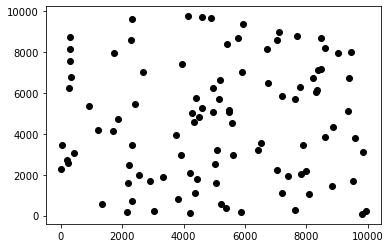

In [15]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Solution Representation and Initial Solution

In [16]:
random.seed(1)
Solution_i=random.sample(list(range(n)), n)

dfSolution_i=pd.DataFrame(Solution_i)
dfSolution_i
dflinkindex_p1=dfSolution_i
dflinkindex_p2=dfSolution_i.shift(-1)
dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
linkindex_p1=dflinkindex_p1.to_numpy()
linkindex_p2=dflinkindex_p2.to_numpy()
linkindex_p1=linkindex_p1.astype(int)
linkindex_p2=linkindex_p2.astype(int)
linkindex_p1=linkindex_p1.transpose()[0]
linkindex_p2=linkindex_p2.transpose()[0]


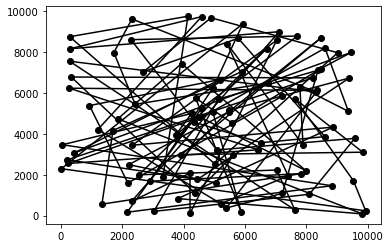

In [17]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])
    
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

In [18]:
#Compute Objective Value
ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
ObjValue

508089.55416686134

In [19]:
#Exchange Operator
def swap_random(seq):
    idx = range(len(seq))
    i1, i2 = random.sample(idx, 2)
    seq[i1], seq[i2] = seq[i2], seq[i1]

In [20]:
#Insert Operator
def insert_random(seq):
    idx = range(len(seq))
    i1=random.sample(idx, 1)
    remove_index=np.where(np.array(seq)==i1)
    seq.pop(int(remove_index[0]))
    seq.insert(random.sample(idx, 1)[0], i1[0])

In [21]:
#3-Opt
def k_opt(seq):
    global Solution_i
    idx = range(len(seq))
    i1=np.sort(random.sample(idx, 2))

    #Split in 3 
    Opt1=seq[0:i1[0]]
    Opt2=seq[(i1[0]):i1[1]]
    Opt3=seq[(i1[1]):len(seq)]
    Opt2rev=Opt2[::-1]
    Opt3rev=Opt3[::-1]

    #3-Opt Solutions
    Sol1=Opt1+Opt2rev+Opt3rev
    Sol2=Opt1+Opt3+Opt2
    Sol3=Opt1+Opt3+Opt2rev
    Sol4=Opt1+Opt3rev+Opt2

    #2 Opt Solution
    Sol5=Opt1+Opt2rev+Opt3
    Sol6=Opt1+Opt2+Opt3rev
    Sol7=Opt1+Opt3rev+Opt2rev

    OptNeigh=[Sol1,Sol2,Sol3,Sol4,Sol5,Sol6,Sol7]

    ObjValue_Neigh=list();
    #Compute Obj Value of All Solutions
    for i_index in range(len(OptNeigh)):
        Solution_Neigh=OptNeigh[i_index]

        dfSolution_i=pd.DataFrame(Solution_Neigh)
        dflinkindex_p1=dfSolution_i
        dflinkindex_p2=dfSolution_i.shift(-1)
        dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
        linkindex_p1=dflinkindex_p1.to_numpy()
        linkindex_p2=dflinkindex_p2.to_numpy()
        linkindex_p1=linkindex_p1.astype(int)
        linkindex_p2=linkindex_p2.astype(int)
        linkindex_p1=linkindex_p1.transpose()[0]
        linkindex_p2=linkindex_p2.transpose()[0]

        #Compute Objective Value
        ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
        ObjValue_Neigh=np.append(ObjValue_Neigh,ObjValue)
        OptNeigh[np.argmin(ObjValue_Neigh)]
        Solution_i=OptNeigh[np.argmin(ObjValue_Neigh)]

### Local Search Algorithm

In [22]:
random.seed(3)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0] 
OptSolution=Solution_i

while cputime_i[-1]<150:
    
    iteration=iteration+1
    Solution_i=copy.deepcopy(OptSolution)
    
    swap_it=0
    while swap_it<no_swap:
        swap_random(Solution_i) # Change Move Operator Here
        swap_it=swap_it+1
        
    dfSolution_i=pd.DataFrame(Solution_i)
    dfSolution_i
    dflinkindex_p1=dfSolution_i
    dflinkindex_p2=dfSolution_i.shift(-1)
    dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
    linkindex_p1=dflinkindex_p1.to_numpy()
    linkindex_p2=dflinkindex_p2.to_numpy()
    linkindex_p1=linkindex_p1.astype(int)
    linkindex_p2=linkindex_p2.astype(int)
    linkindex_p1=linkindex_p1.transpose()[0]
    linkindex_p2=linkindex_p2.transpose()[0]
    
    #Compute Objective Value
    ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
        
    #Update Optimal Solution
    if ObjValue<ObjValueOpt:
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolution=copy.deepcopy(Solution_i)
    
    Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
    
    print(ObjValueOpt)
    
    def connectpoints(x,y,p1,p2):
        x1, x2 = x[p1], x[p2]
        y1, y2 = y[p1], y[p2]
        plt.plot([x1,x2],[y1,y2],'k-')

    #for i_index in range(len(linkindex_p2)): 
    #    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

    #plt.plot(coordlct_x, coordlct_y, 'o', color='black');

    #clear_output(wait=True)
    #plt.draw()
    #plt.pause(0.1)
    #plt.clf()
        
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

507940.820874547
507940.820874547
507940.820874547
507940.820874547
507940.820874547
507534.51765769196
507534.51765769196
507534.51765769196
507534.51765769196
507534.51765769196
507534.51765769196
507534.51765769196
507534.51765769196
507534.51765769196
502319.28379511647
502319.28379511647
502319.28379511647
502319.28379511647
499781.96466809185
498586.0298968324
498586.0298968324
498586.0298968324
492969.2623358113
492969.2623358113
491546.7261088608
491358.0232253416
491358.0232253416
491358.0232253416
489403.7514408021
489403.7514408021
484666.4724636227
484666.4724636227
484666.4724636227
484666.4724636227
484666.4724636227
475569.48468708305
475569.48468708305
472130.460883221
472130.460883221
472105.7941125141
472105.7941125141
471370.88856127963
471328.53008001635
471328.53008001635
471328.53008001635
464029.9936719972
464029.9936719972
464029.9936719972
463456.4282894898
462432.4993455601
452153.79714434734
436374.14948409086
436374.14948409086
436374.14948409086
436374.1494

273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
273550.1071975164
271296.5628203523
271296.5628203523
271296.5628203523
271296.5628203523
268843.8981249104
268843.8981249104
268843.8981249104
266054.26510980166
266054.26510980166
266054.26510980166
266054.26510980166
265921.824463132
265921.824463132
265921.824463132
265921.824463132
264447.49680668995
264447.49680668995
264447.49680668995
264447.49680668995
264447.49680668995
26444

241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241951.09311225484
241903.7708053815
241903.7708053815
241903.7708053815
241903.7708053815
241903.7708053815
241903.7708053815
241812.04325742208
241812.04325742208
241812.04325742208
241812.04325742208
241812.04325742208

216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
216392.0792035327
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213626.75137164097
213

199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053372425
199978.99053

193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
193515.88115512993
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222937773
192322.42222

186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411274128
186201.42411

185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769177603
185940.87769

185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.7319974516
185656.731

182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
182276.98371515897
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
180468.22788281334
178136.7902983381
178136.7902983381
178136.7902983381
178136.7902983381
178136.7902983381
178136.7902983381
178136.7902983381
178136.7902983381
178136.7902983381
178136.7902983381
178136.7902983381
178136.7902983381
17813

170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.0072905882
170085.007

168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934943103
168197.97934

167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172784303
167760.11172

165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220613745
165725.24220

163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
163859.28031798056
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457455235
162736.00457

161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
161539.90604154678
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
160076.1241877997
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.86900459835
159535.8690

155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006422396
155493.08006

153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153647.84946391097
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531624848
153617.25531

151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424992716
151538.73424

150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677

150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150953.12677739575
150771.93804273297
150771.93804273297
150771.93804273297
150771.93804273297
150771.93804273297
150771.93804273297
150771.93804273297
150771.93804

149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.5692922586
149797.569

149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393643985
149068.48393

145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145902.8398662723
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.40215750833
145545.402

145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564575418
145120.83564

143771.78213836614
143771.78213836614
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143657.61443505902
143005.43294

142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142339.01440956228
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856379688
142215.76856

141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696746757
141933.27696

141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290718802
141476.40290

140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.5840828313
140073.584

139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.530

139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.5308029044
139065.530

136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.6052252826
136908.605

136536.59777241744
136536.59777241744
136536.59777241744
136536.59777241744
136536.59777241744
136536.59777241744
136536.59777241744
136515.80452373458
136515.80452373458
136515.80452373458
136515.80452373458
136515.80452373458
136515.80452373458
136515.80452373458
136515.80452373458
136515.80452373458
136515.80452373458
136515.80452373458
136515.80452373458
136515.80452373458
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420426814
136135.10420

136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653579234
136078.25653

135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.891650437
135142.8916504

135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661

135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661801514
135061.59661

134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.4518022823
134944.451

131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825007548
131308.34825

131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587

131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587

131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587139252
131256.21587

131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464

131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464667475
131079.77464

130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558593521
130842.62558

129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110241685
129913.14110

129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.4435007086
129802.443

129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.1067030442
129606.106

129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931

129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931793933
129513.36931

129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577

129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577

129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577

129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577

129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577

129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577434515
129507.58577

129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700

129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700

129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700

129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700

129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700

129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700093837
129465.93700

128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513

128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513209731
128943.26513

128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261243481
128623.66261

128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126

128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126988274
128415.38126

127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836

127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836

127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836

127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836

127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836

127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836194163
127504.21836

127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245797307
127327.22245

126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850609434
126437.53850

125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920570137
125718.06920

125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874

125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874

125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874414138
125030.06874

124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381

124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381

124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381086156
124905.52381

123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
123662.97657448532
122839.3952380493
122839.3952380493
122839.3952380493
122839.3952380493
122839.3952380493
122839.3952380493
122839.3952380493


122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112036296
122339.33112

120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718

120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718

120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718

120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718

120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718642848
120589.50718

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177001572
120133.17177

### Read output variables

In [23]:
min(Objvalue_list)

120133.17177001572

### Plot results

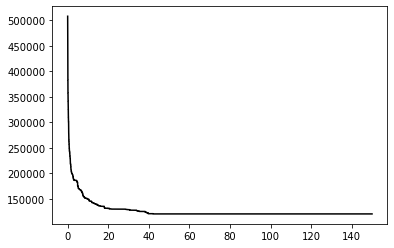

In [24]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')

In [25]:
solutiondf=pd.DataFrame(cputime_i[range(len(Objvalue_list))],Objvalue_list)

#solutiondf.to_csv('SolDf.csv',index=True)

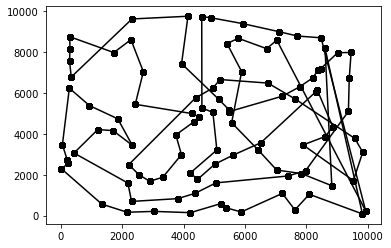

In [26]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

    plt.plot(coordlct_x, coordlct_y, 'o', color='black');